## plot bms figs

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
def plot_bms_freq(input_csv):
    """plot model frequency and exceed prob"""
    df = pd.read_csv(input_csv, index_col=None)
    df['model_name'] = df['model_name'].str.replace('subjects_','')
    df_sort = df.sort_values('model_frequency', ascending=False)[['model_frequency','exceedance_prob',
                                                                  'protected_exceedance_prob','model_name']]
    f = df_sort[['model_frequency','exceedance_prob','protected_exceedance_prob']].plot.bar()
    f.set_xticklabels(df_sort.model_name)
    fname = input_csv.split('/')[-1].split('.')[0]
    f.set_title('Bayesian model comparison ('+fname+')')
    if 'rt' in input_csv:
        f.get_figure().savefig('./figs_rt/'+fname+'_freq_rt.pdf',bbox_inches = 'tight')
    else:
        f.get_figure().savefig('./figs/'+fname+'_freq.pdf',bbox_inches = 'tight')

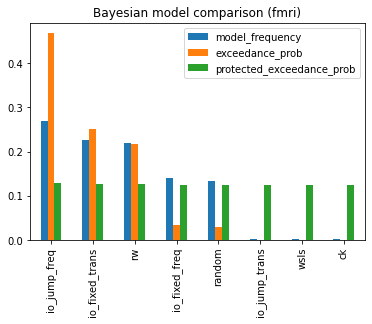

In [35]:
plot_bms_freq('./output/fmri.csv')

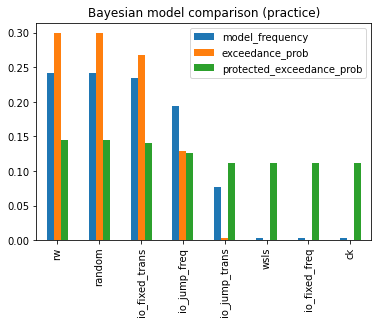

In [36]:
plot_bms_freq('./output/practice.csv')

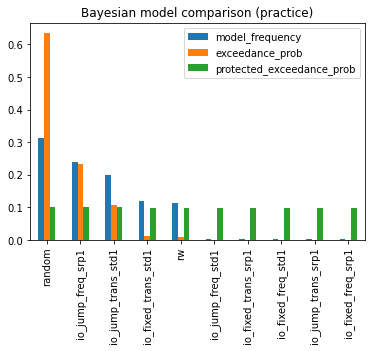

In [37]:
plot_bms_freq('./output_rt/practice.csv')

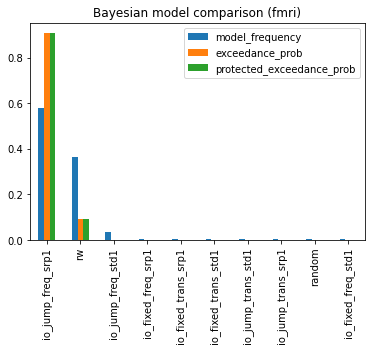

In [38]:
plot_bms_freq('./output_rt/fmri.csv')

In [29]:
def plot_subject(input_csv):
    """plot subject posterior"""
    df = pd.read_csv(input_csv, index_col=None)
    df.columns = df.columns.str.replace('subjects_','')
    g = sns.heatmap(df, cmap="YlGnBu", vmin=0, vmax=1)
    fname = input_csv.split('/')[-1].split('.')[0]
    if 'rt' in input_csv:
        plt.savefig('./figs_rt/'+fname+'_rt.pdf',bbox_inches = 'tight')        
    else:
        plt.savefig('./figs/'+fname+'.pdf',bbox_inches = 'tight')

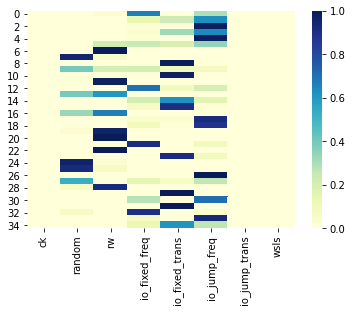

In [30]:
plot_subject('./output/fmri_subject.csv')

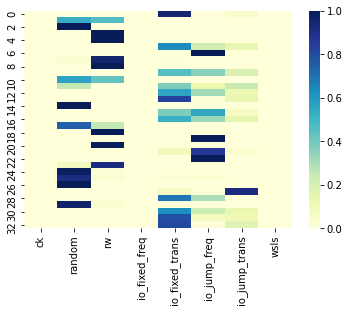

In [31]:
plot_subject('./output/practice_subject.csv')

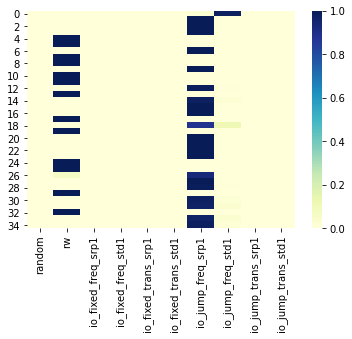

In [32]:
plot_subject('./output_rt/fmri_subject.csv')

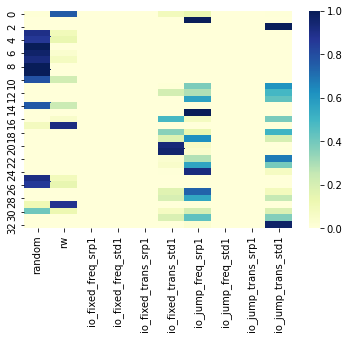

In [33]:
plot_subject('./output_rt/practice_subject.csv')

In [86]:
def match_subject(input_csv):
    """match subject posterior to models"""
    df = pd.read_csv(input_csv, index_col=None)
    df.columns = df.columns.str.replace('subjects_','')
#     print(df.idxmax(axis=1).value_counts())
    df_max = df.idxmax(axis=1)
    sj_io = df_max[df_max.str.match('io')].index
    sj_rd = df_max[df_max.str.match('random')].index
    sj_rw = df_max[df_max.str.match('rw')].index
    return sj_io, sj_rd, sj_rw

In [105]:
io, rd, rw = match_subject('./output/fmri_subject.csv')
print(f'IO subjects={io}\nRandom subjects={rd}\nRW subjects={rw}')

IO subjects=Int64Index([0, 1, 2, 3, 4, 5, 8, 10, 12, 14, 15, 17, 18, 21, 23, 26, 29, 30,
            31, 32, 33, 34],
           dtype='int64')
Random subjects=Int64Index([7, 9, 24, 25, 27], dtype='int64')
RW subjects=Int64Index([6, 11, 13, 16, 19, 20, 22, 28], dtype='int64')


In [107]:
io, rd, rw = match_subject('./output/practice_subject.csv')
print(f'IO subjects={io}\nRandom subjects={rd}\nRW subjects={rw}')

IO subjects=Int64Index([0, 5, 6, 9, 11, 12, 13, 15, 16, 19, 21, 22, 27, 28, 30, 31, 32], dtype='int64')
Random subjects=Int64Index([1, 2, 10, 14, 17, 24, 25, 26, 29], dtype='int64')
RW subjects=Int64Index([3, 4, 7, 8, 18, 20, 23], dtype='int64')
